<a href="https://colab.research.google.com/github/gabriela-148/IDS/blob/main/HW6/Project6_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gabriella Huegel**

**Project 6 Report**


**CSC346**


**11/30/23**
# Problem 1 - Python

For this assignment, I used Google Colab to execute all Python code. I also referenced the descion_trees notebook in the IDS repository.

First, I imported the necessary libraries so I could import the adult_training CSV file from GitHub IDS repository.

In [ ]:
# Import the necessary libaries
import pandas as pd
import numpy as np

# Reads the CSV file to a dataframe called trainingDF
trainingDF = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

trainingDF

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


Next, I started to cleanse the data. I checked to see if there were any null values. Then, I noticed that there were missing values in the dataset which were indicated by a "?". I went through each column and replaced the "?" with NA, then I replaced the NA with the mode or average depending on if the column was numeric or categorical.


In [ ]:
# Import numpy library to get NaN
import numpy as np

# Set all ? to NaN
trainingDF['education'] = trainingDF['education'].replace({"?": np.nan})
trainingDF['workclass'] = trainingDF['workclass'].replace({"?": np.nan})
trainingDF['sex'] = trainingDF['sex'].replace({"?": np.nan})
trainingDF['age'] = trainingDF['age'].replace({"?": np.nan})
trainingDF['occupation'] = trainingDF['occupation'].replace({"?": np.nan})
trainingDF['marital-status']= trainingDF['marital-status'].replace({"?": np.nan})
trainingDF['capital-gain'] = trainingDF['capital-gain'].replace({"?": np.nan})
trainingDF['capital-gain'] = trainingDF['capital-gain'].replace({99999: np.nan})
trainingDF['capital-loss'] = trainingDF['capital-loss'].replace({"?": np.nan})
print(trainingDF.isnull().sum())


# Loop through the 'Education' column and check for NaN values
for i in range(len(trainingDF)):
    if pd.isna(trainingDF.loc[i, 'education']):
        # Calculate the average of the 'Education' column excluding NaN values
        avg_education = trainingDF['education'].mean()
        # Replace the NaN value with the average
        trainingDF.loc[i, 'education'] = avg_education

# Loop through the 'Age' column and check for NaN values
for i in range(len(trainingDF)):
    if pd.isna(trainingDF.loc[i, 'age']):
        # Calculate the average of the 'age' column excluding NaN values
        avg_education = trainingDF['age'].mean()
        # Replace the NaN value with the average
        trainingDF.loc[i, 'age'] = avg_education

# Loop through the 'capital-gain' column and check for NaN values
for i in range(len(trainingDF)):
    if pd.isna(trainingDF.loc[i, 'capital-gain']):
        # Calculate the average of the 'capital-gain' column excluding NaN values
        avg_cap_gain = trainingDF['capital-gain'].mean()
        # Replace the NaN value with the average
        trainingDF.loc[i, 'capital-gain'] = avg_cap_gain

# Loop through the 'capital-loss' column and check for NaN values
for i in range(len(trainingDF)):
    if pd.isna(trainingDF.loc[i, 'capital-loss']):
        # Calculate the average of the 'capital-loss' column excluding NaN values
        avg_cap_gain = trainingDF['capital-loss'].mean()
        # Replace the NaN value with the average
        trainingDF.loc[i, 'capital-loss'] = avg_cap_gain

# Loop through the 'Workclass' column and check for NaN values
mode_workclass = trainingDF['workclass'].mode().iloc(0)

for i in range(len(trainingDF)):
    if pd.isna(trainingDF.loc[i, 'workclass']):
        # Replace the NaN value with the mode
        trainingDF.loc[i, 'workclass'] = mode_workclass

# Loop through the 'Sex' column and check for NaN values
mode_sex = trainingDF['sex'].mode().iloc(0)

for i in range(len(trainingDF)):
    if pd.isna(trainingDF.loc[i, 'sex']):
        # Replace the NaN value with the mode
        trainingDF.loc[i, 'sex'] = mode_sex

# Loop through the 'Occupation' column and check for NaN values
mode_occ = trainingDF['occupation'].mode().iloc(0)

for i in range(len(trainingDF)):
    if pd.isna(trainingDF.loc[i, 'occupation']):
        # Replace the NaN value with the mode
        trainingDF.loc[i, 'occupation'] = mode_occ

# Loop through the 'Marital-Status' column and check for NaN values
mode_occ = trainingDF['marital-status'].mode().iloc(0)

for i in range(len(trainingDF)):
    if pd.isna(trainingDF.loc[i, 'marital-status']):
        # Replace the NaN value with the mode
        trainingDF.loc[i, 'marital-status'] = mode_occ

print(trainingDF.isnull().sum())

age                 0
workclass         829
education           0
marital-status      0
occupation        834
sex                 0
capital-gain       69
capital-loss        0
income              0
dtype: int64
age               0
workclass         0
education         0
marital-status    0
occupation        0
sex               0
capital-gain      0
capital-loss      0
income            0
dtype: int64


After completing the data cleansing, there are no ? or null values in the data set so I could continue analyzing the data.

Now, I must encode the trainingDF dataframe so that I can create the training data and the test data to be used in the creation of the decision tree.

In order for the decision trees to be made off any attribute in the dataframe, I must create a function that allows me to choose any attribute to analyze.

The encodeData method takes in four parameters: 2 attributes you want to combine to be the target, and the two predictors you are using to predict the outcome of the target.

Then, it encodes the data whether it is numeric or categoric.

In [ ]:
# Importing libraries to encode categoric data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
encoded_trainingDF = pd.DataFrame()

def encodeData(attribute1, attribute2, predictor1, predictor2):
  # Create a new predictor
  trainingDF['combined-attributes'] = abs(trainingDF[attribute1]) + abs(trainingDF[attribute2])
  # Create a new dataframe for the classification task with only three columns: two predictors and a target
  new_trainingDF = trainingDF.filter([predictor1,'combined-attributes',predictor2], axis=1)
  print(new_trainingDF.head(10))

  # Encoding categoric columns
  # save the encoded dataframe here

  columnLen = (len(new_trainingDF.columns) -1)
  # Encode  only the categoric or boolean attributes (if any)
  for i in range(0, new_trainingDF.shape[1]):
      if new_trainingDF.dtypes[i]=='object' or new_trainingDF.dtypes[i]=='bool':
          encoded_trainingDF[new_trainingDF.columns[i]] = le.fit_transform(new_trainingDF[new_trainingDF.columns[i]])
      else:
          encoded_trainingDF[new_trainingDF.columns[i]] = new_trainingDF[new_trainingDF.columns[i]]
  print(encoded_trainingDF.head(10))


# Testing that the encoding was successful
encodeData('capital-gain', 'capital-loss', 'marital-status', 'income')

          marital-status  combined-attributes income
0     Married-civ-spouse                  0.0  <=50K
1               Divorced                  0.0  <=50K
2  Married-spouse-absent                  0.0  <=50K
3     Married-civ-spouse                  0.0   >50K
4          Never-married              14084.0   >50K
5     Married-civ-spouse                  0.0   >50K
6     Married-civ-spouse                  0.0  <=50K
7     Married-civ-spouse               2042.0  <=50K
8     Married-civ-spouse                  0.0   >50K
9               Divorced                  0.0  <=50K
   marital-status  combined-attributes  income
0               2                  0.0       0
1               0                  0.0       0
2               3                  0.0       0
3               2                  0.0       1
4               4              14084.0       1
5               2                  0.0       1
6               2                  0.0       0
7               2               2042.0   

Now I can plot the model using the encoded data.

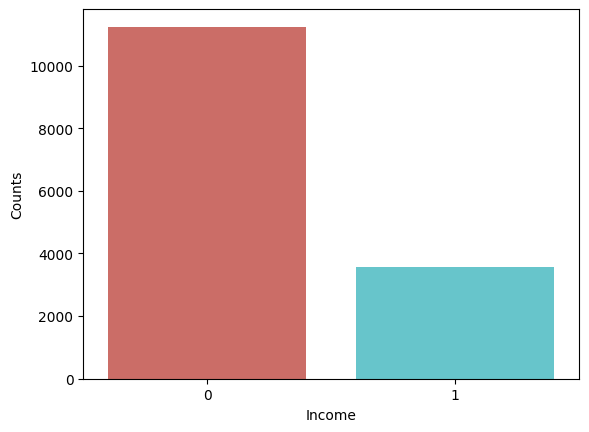

In [ ]:
# Examine target class distrbutions

# Import necessary libraries to plot encoded dataframe
import seaborn as sns
import matplotlib.pyplot as plt

# Plots encoded data frame based on input
sns.countplot(x='income', data=encoded_trainingDF, palette = 'hls')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()

Now, I can choose any attributes I would like to encode to use in my decision tree models.

Next, I must calculate the training and testing data from the encoded dataframe I just created to be used to create the DT model. In this case, I will be using an 80-20 split for the training and testing data.

In [ ]:
# Import the necessary libraries to create train and test data
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_trainingDF.filter(['marital-status','combined-attributes'], axis=1)
y = encoded_trainingDF['income']


# Prepare training and test data with an 80/20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

I printed out the size of the training and testing data to ensure that the data is initalized before creating the model.

In [ ]:
print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (11837, 2)
Test size: (2960, 2)


Next, I created the model for both the testing and training datasets.

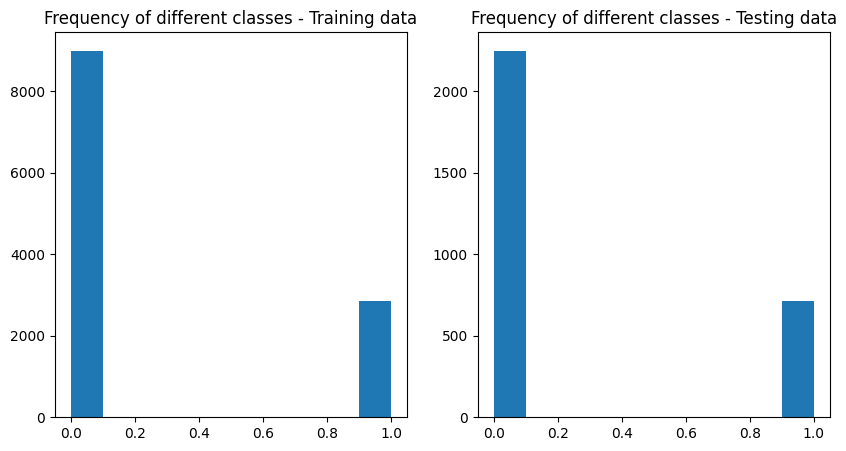

In [ ]:
# Find out class distributions in training and test datasets.

# Training dataset
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

# Test dataset
plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Testing data');

Analyze

Next, I imported the Decision Tree classifier to create the decision tree. I created the makeDTMode that takes the type of classifier, training data, and test data. It makes either a gini or entropy model based on the type given and uses the training and testing data to make the DT.

Then, I created the displayTree method that takes a classifier type and displays the decision tree.

|--- marital-status <= 2.50
|   |--- combined-attributes <= 5095.50
|   |   |--- class: 0
|   |--- combined-attributes >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- class: 0

|--- marital-status <= 2.50
|   |--- combined-attributes <= 5095.50
|   |   |--- class: 0
|   |--- combined-attributes >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- class: 0



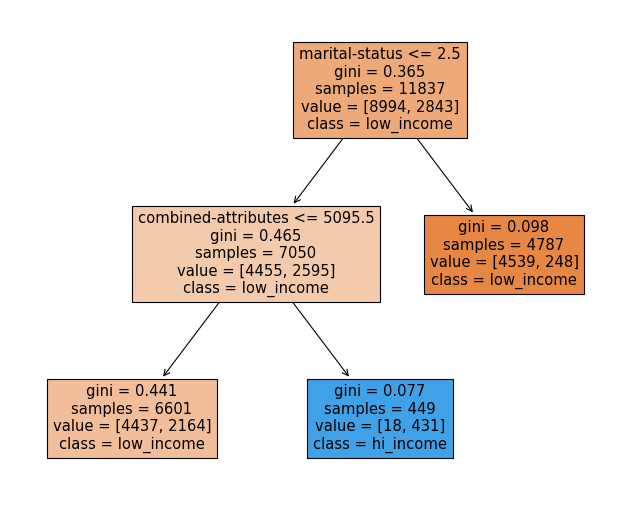

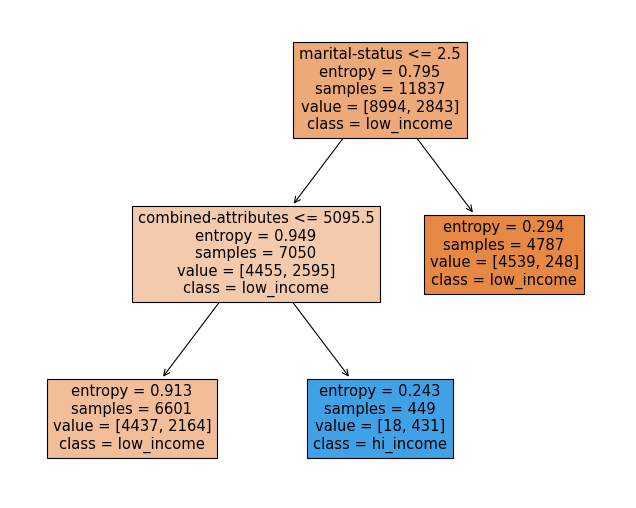

In [ ]:
# Import DecisionTreeClassifier libraries to create DT
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Function to decision tree model using cart classifier
def makeDTModel(type, X_train, y_train):
  if type == 'gini':
    return DecisionTreeClassifier(criterion = "gini",
                                         max_leaf_nodes=3,
                                         random_state = 120).fit(X_train, y_train)
  else:
    return DecisionTreeClassifier(criterion = "entropy",
                                       max_leaf_nodes=3,
                                       random_state = 120).fit(X_train,y_train)
# Function to display decision tree
def displayTree(classifierType):
  # Control the figure size
  from matplotlib.pyplot import figure
  figure(figsize=(10, 8), dpi=80)

  # Plot the tree
  cn = ['low_income', 'hi_income']
  tree.plot_tree(classifierType, feature_names=X.columns.values.tolist(),
                                  class_names=cn,
                                  filled = True)

  # Print the text version of the tree
  text_representation = tree.export_text(classifierType,
                                        feature_names=X.columns.values.tolist())
  print(text_representation)


# Testing the makeDtModel and displayTree methods
cart_classifier = makeDTModel("gini", X_train, y_train)
c5_classifier = makeDTModel("entropy", X_train, y_train)

displayTree(cart_classifier)
displayTree(c5_classifier)

Based on this decision tree, I can see that if a person is not married with a low income, they are more likely to have little to none capital gain and losses. And, if a person is married, with a low income, they are more likle yo have a combinded capital gains and losses less than or equal to 5095.5.

Next, I tested the model's accuracy using CART classification accuracy.

In [ ]:
# Record CART's classification accuracy on training and test datasets
score1 = round(cart_classifier.score(X_train, y_train), 2) # training score
score2 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))


# Record C5's classification accuracy on training and test datasets
score3 = round(c5_classifier.score(X_train, y_train), 2) # training score
score4 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (score3, score4))

CART Training and Testing scores: 0.79, 0.79
C5.0 Training and Testing scores: 0.79, 0.79


Based on these test scores, I can see that in both models were around 80% accurate in predicting the target.

Next, I will display the confusion matrix for the selected attributes. I created the displayCM method that takes the classifier type and all the training and testing data. Depending on the classifier type it plots the confusion matrix.

[[2243    6]
 [ 607  104]]


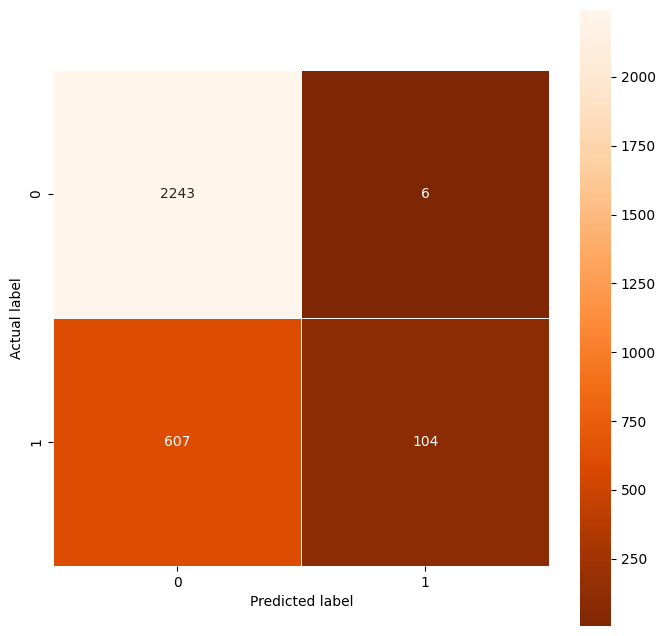

In [ ]:
# Import libraries to calculate the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to display the confusion matrix
def displayCM(classifier, X_train, y_train, X_test, y_test):
  if classifier == 'cart_classifier':
    # Record CART's and C5's predictions
    cart_predictions = cart_classifier.predict(X_test)
    # Compute TP, TN, FP, FN values for CART
    cart_cm = confusion_matrix(y_true=y_test,
                              y_pred = cart_predictions)
    # Print CART's confusion matrix
    print(cart_cm)
    # Plot CM for cart
    plt.figure(figsize=(8,8))
    sns.heatmap(cart_cm, annot=True,
                linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
  else:
    c5_predictions = c5_classifier.predict(X_test)
    c5_cm = confusion_matrix(y_true=y_test,
                            y_pred = c5_predictions)
    # Print C5's confusion matrix
    print(c5_cm)
    # Plot CM for C5
    plt.figure(figsize=(8,8))
    sns.heatmap(c5_cm, annot=True,
                linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# Calls the displayCM to test if the method works as expected
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

Based on this confusion matrix, 2235 instances were correctly classified as Class 0.
117 instances were correctly classified as Class 1.
14 instances were misclassified as Class 0 when they actually belong to Class 1.
594 instances were misclassified as Class 1 when they actually belong to Class 0.

Next, I am comparing the two models I created using the compareModels method.

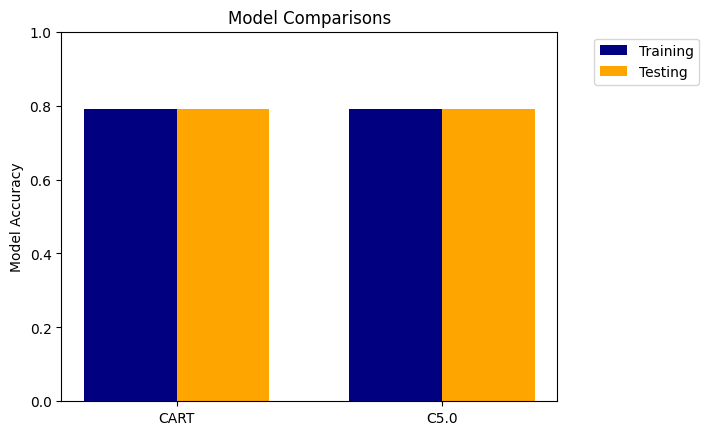

In [ ]:
# Import the necessary libraries for the compareModels method
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Function to compare the two classifier models
def compareModels(classifier1, classifier2):
  labels = ['CART', 'C5.0']
  training_scores = [score1, score3]
  testing_scores =  [score2, score4]

  x = np.arange(2)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()

# Tests if the function works correctly
compareModels(cart_classifier, c5_classifier)

As we have seen previously, both classifiers created a model with an 80% accuracy with both the training and testing data. Given this graphic, I can conclude that the model correctly predicted around 80% of the instances for the target.  